In [1]:
#Importing libraries for data pre-processing and analysis
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

dataset_path = "../Dataset/Renewable.csv"
data_frame = pd.read_csv(dataset_path)

In [2]:
print(data_frame)

                       Time  Energy delta[Wh]   GHI  temp  pressure  humidity  \
0       2017-01-01 00:00:00                 0   0.0   1.6      1021       100   
1       2017-01-01 00:15:00                 0   0.0   1.6      1021       100   
2       2017-01-01 00:30:00                 0   0.0   1.6      1021       100   
3       2017-01-01 00:45:00                 0   0.0   1.6      1021       100   
4       2017-01-01 01:00:00                 0   0.0   1.7      1020       100   
...                     ...               ...   ...   ...       ...       ...   
196771  2022-08-31 16:45:00               118  23.7  18.6      1023        57   
196772  2022-08-31 17:00:00                82  15.6  18.5      1023        61   
196773  2022-08-31 17:15:00                51   8.0  18.5      1023        61   
196774  2022-08-31 17:30:00                24   2.1  18.5      1023        61   
196775  2022-08-31 17:45:00                 0   0.0  18.5      1023        61   

        wind_speed  rain_1h

In [3]:
#Get the first 5 rows for easier view of data
data_frame.head(5)

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1


In [4]:
#Get the botton 5 rows to get a feel of how the data evolves from the top down
data_frame.tail(5)

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
196771,2022-08-31 16:45:00,118,23.7,18.6,1023,57,3.8,0.0,0.0,52,1,780,825,0.95,3,16,8
196772,2022-08-31 17:00:00,82,15.6,18.5,1023,61,4.2,0.0,0.0,60,1,795,825,0.96,3,17,8
196773,2022-08-31 17:15:00,51,8.0,18.5,1023,61,4.2,0.0,0.0,60,1,810,825,0.98,3,17,8
196774,2022-08-31 17:30:00,24,2.1,18.5,1023,61,4.2,0.0,0.0,60,1,825,825,1.00,3,17,8
196775,2022-08-31 17:45:00,0,0.0,18.5,1023,61,4.2,0.0,0.0,60,0,0,825,0.00,3,17,8


In [5]:
#Check dataset "size" amount of rows columns
data_frame.shape

(196776, 17)

In [6]:
#Understand data, datatypes and null counts
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196776 entries, 0 to 196775
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Time                    196776 non-null  object 
 1   Energy delta[Wh]        196776 non-null  int64  
 2   GHI                     196776 non-null  float64
 3   temp                    196776 non-null  float64
 4   pressure                196776 non-null  int64  
 5   humidity                196776 non-null  int64  
 6   wind_speed              196776 non-null  float64
 7   rain_1h                 196776 non-null  float64
 8   snow_1h                 196776 non-null  float64
 9   clouds_all              196776 non-null  int64  
 10  isSun                   196776 non-null  int64  
 11  sunlightTime            196776 non-null  int64  
 12  dayLength               196776 non-null  int64  
 13  SunlightTime/daylength  196776 non-null  float64
 14  weather_type        

***Above we observe that each column has the maximum number of entries***
***Therefore: No null values in the dataset***

**Time is an object data-type, it should be converted to datetime**



In [7]:
#Lets double check for the missing values 
data_frame.isnull().sum()

Time                      0
Energy delta[Wh]          0
GHI                       0
temp                      0
pressure                  0
humidity                  0
wind_speed                0
rain_1h                   0
snow_1h                   0
clouds_all                0
isSun                     0
sunlightTime              0
dayLength                 0
SunlightTime/daylength    0
weather_type              0
hour                      0
month                     0
dtype: int64

**Comfirmed that there are no null values**

In [8]:
#Breakdown of data basic statistics(looking for descreptencies)
data_frame.describe() 

,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
count,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000
mean,573.008228,32.596538,9.790521,1015.292780,79.810566,3.937746,0.066035,0.007148,65.974387,0.519962,211.721094,748.644347,0.265187,3.198398,11.498902,6.298329
std,1044.824047,52.172018,7.995428,9.585773,15.604459,1.821694,0.278913,0.069710,36.628593,0.499603,273.902186,194.870208,0.329023,1.289939,6.921887,3.376066
min,0.000000,0.000000,-16.600000,977.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,450.000000,0.000000,1.000000,0.000000,1.000000
25%,0.000000,0.000000,3.600000,1010.000000,70.000000,2.600000,0.000000,0.000000,34.000000,0.000000,0.000000,570.000000,0.000000,2.000000,5.000000,3.000000
50%,0.000000,1.600000,9.300000,1016.000000,84.000000,3.700000,0.000000,0.000000,82.000000,1.000000,30.000000,765.000000,0.050000,4.000000,11.000000,6.000000
75%,577.000000,46.800000,15.700000,1021.000000,92.000000,5.000000,0.000000,0.000000,100.000000,1.000000,390.000000,930.000000,0.530000,4.000000,17.000000,9.000000
max,5020.000000,229.200000,35.800000,1047.000000,100.000000,14.300000,8.090000,2.820000,100.000000,1.000000,1020.000000,1020.000000,1.000000,5.000000,23.000000,12.000000


In [9]:
#Convert the time column to date_time for better analysis
data_frame["Time"] = pd.to_datetime(data_frame["Time"]) 

data_frame.head(5)

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1


In [10]:
#Let's check that it's changed
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196776 entries, 0 to 196775
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Time                    196776 non-null  datetime64[ns]
 1   Energy delta[Wh]        196776 non-null  int64         
 2   GHI                     196776 non-null  float64       
 3   temp                    196776 non-null  float64       
 4   pressure                196776 non-null  int64         
 5   humidity                196776 non-null  int64         
 6   wind_speed              196776 non-null  float64       
 7   rain_1h                 196776 non-null  float64       
 8   snow_1h                 196776 non-null  float64       
 9   clouds_all              196776 non-null  int64         
 10  isSun                   196776 non-null  int64         
 11  sunlightTime            196776 non-null  int64         
 12  dayLength               196776

In [11]:
#Drop weather_type column
data_frame = data_frame.drop("weather_type", axis=1)
data_frame.head(5)

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,hour,month
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,0,1
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,0,1
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,0,1
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,0,1
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,1,1


In [12]:
#Drop isSun column (Redudant)
data_frame = data_frame.drop("isSun", axis=1)
data_frame.head(5)

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,sunlightTime,dayLength,SunlightTime/daylength,hour,month
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,450,0.0,0,1
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,450,0.0,0,1
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,450,0.0,0,1
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,450,0.0,0,1
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,450,0.0,1,1


In [13]:
#Export cleaned dataset to Dataset directory
file_path = ("../Dataset/Renewable_Cleaned.csv")
data_frame.to_csv(file_path, index=True)

In [14]:
#Another look of the Data to start EDA
data_frame.describe().T

,count,mean,min,25%,50%,75%,max,std
Time,196776,2019-10-29 22:44:12.085620992,2017-01-01 00:00:00,2018-06-02 10:26:15,2019-10-28 20:52:30,2021-03-24 07:18:45,2022-08-31 17:45:00,NaN
Energy delta[Wh],196776.0,573.008228,0.0,0.0,0.0,577.0,5020.0,1044.824047
GHI,196776.0,32.596538,0.0,0.0,1.6,46.8,229.2,52.172018
temp,196776.0,9.790521,-16.6,3.6,9.3,15.7,35.8,7.995428
pressure,196776.0,1015.29278,977.0,1010.0,1016.0,1021.0,1047.0,9.585773
humidity,196776.0,79.810566,22.0,70.0,84.0,92.0,100.0,15.604459
wind_speed,196776.0,3.937746,0.0,2.6,3.7,5.0,14.3,1.821694
rain_1h,196776.0,0.066035,0.0,0.0,0.0,0.0,8.09,0.278913
snow_1h,196776.0,0.007148,0.0,0.0,0.0,0.0,2.82,0.06971
clouds_all,196776.0,65.974387,0.0,34.0,82.0,100.0,100.0,36.628593


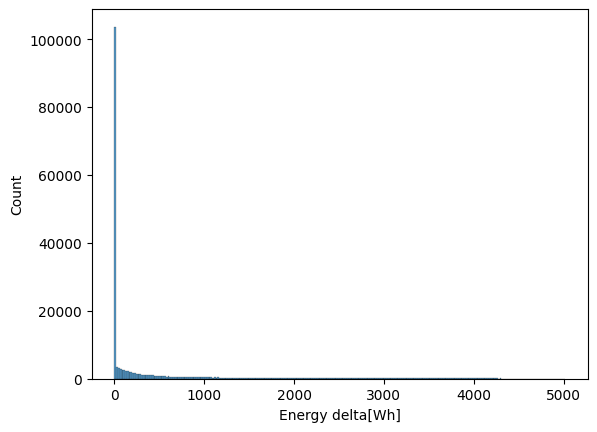

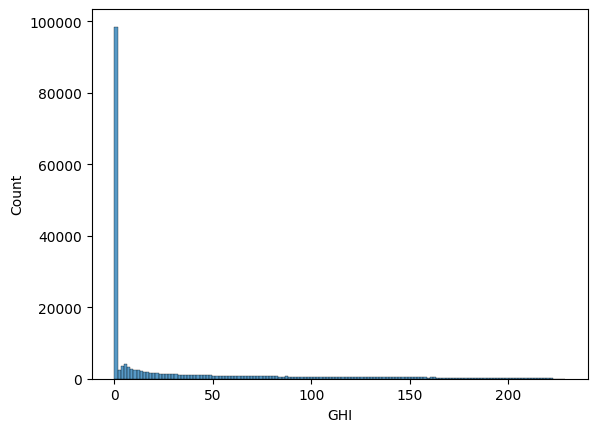

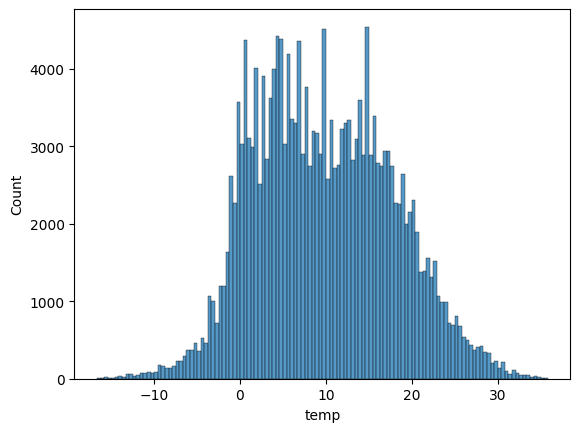

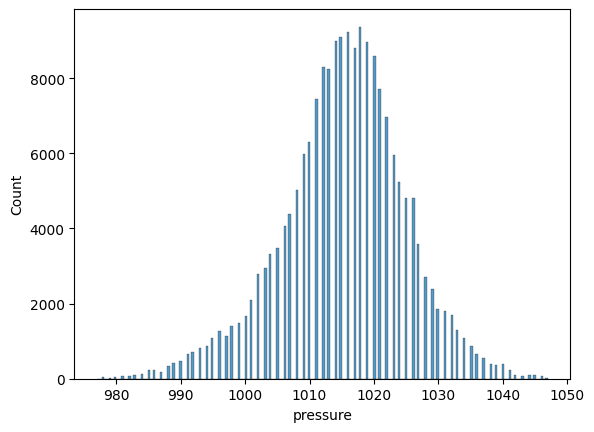

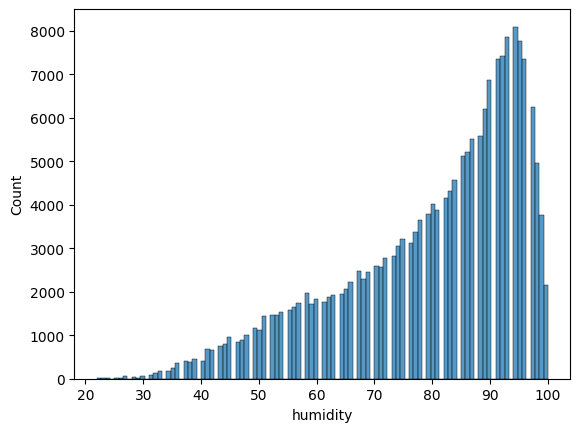

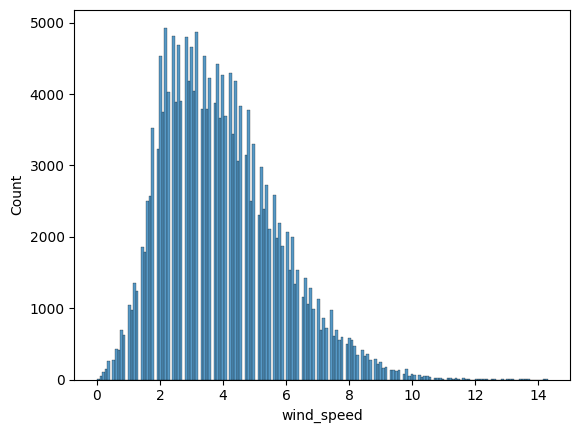

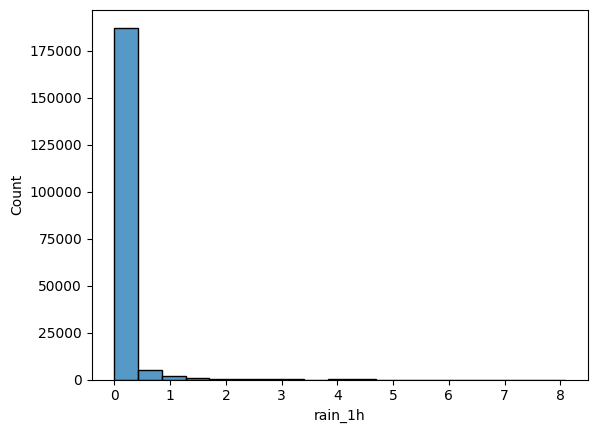

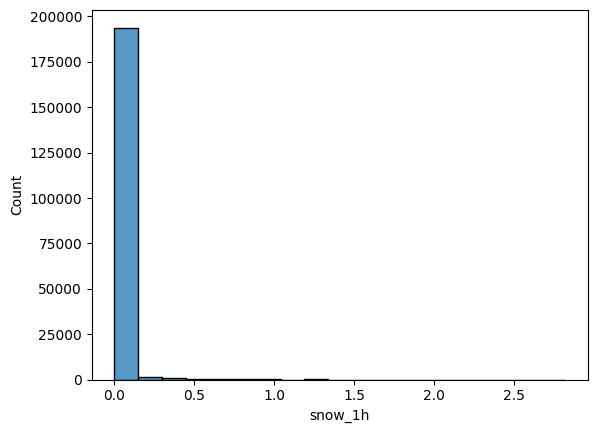

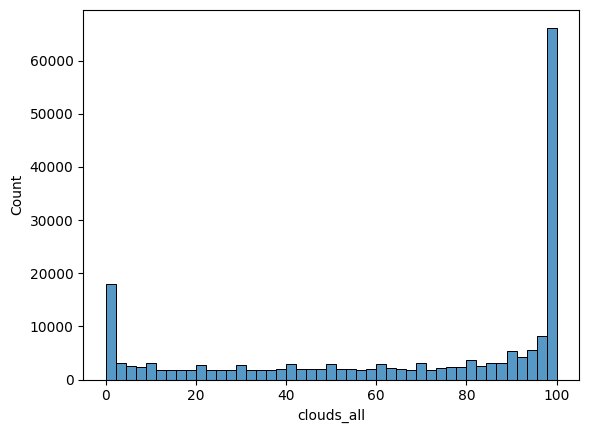

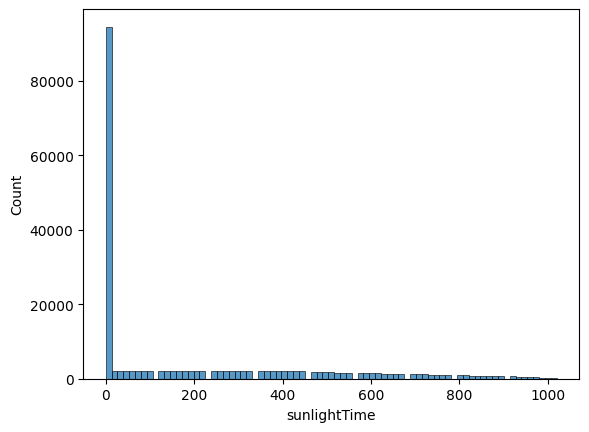

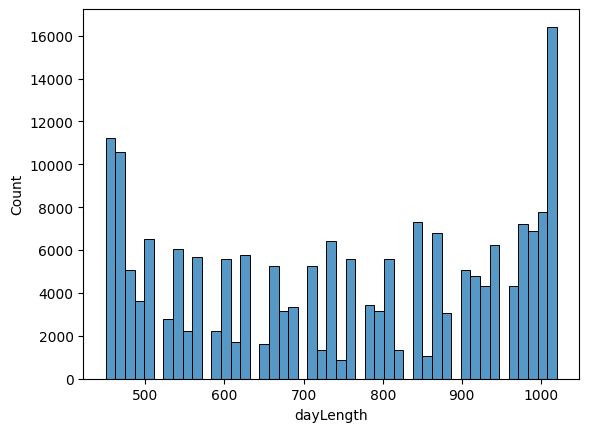

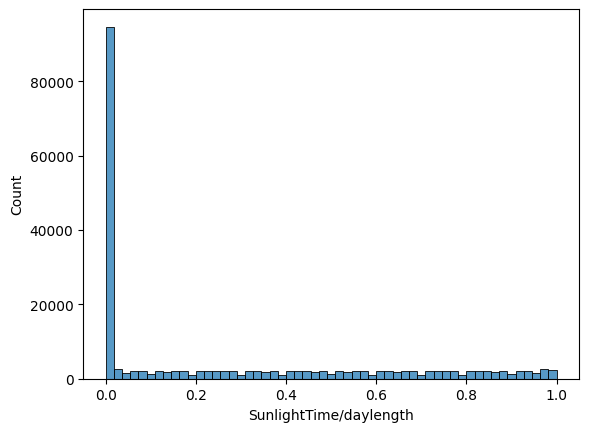

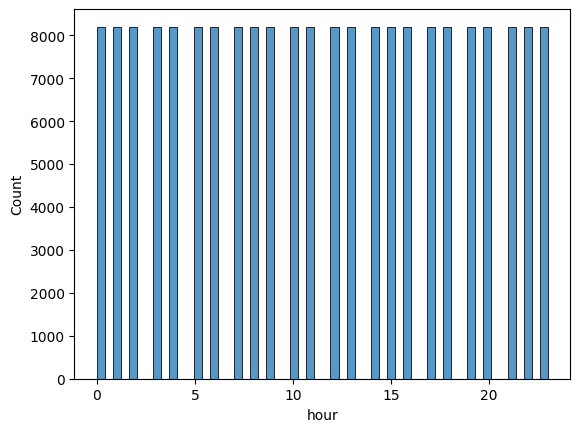

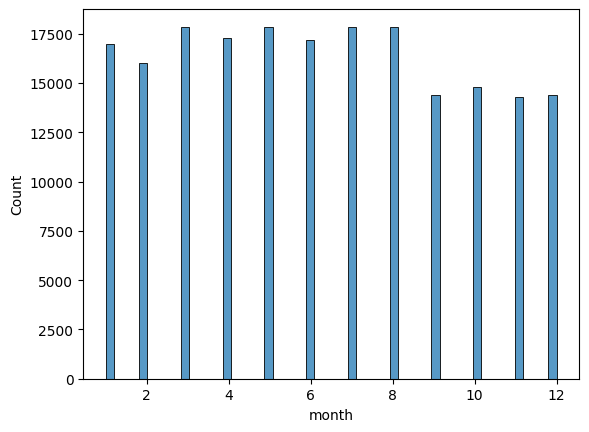

In [15]:
#Histograms (Know the distribution)
for i in data_frame.select_dtypes(include="number").columns:
    sb.histplot(data=data_frame, x =i)
    plt.show()

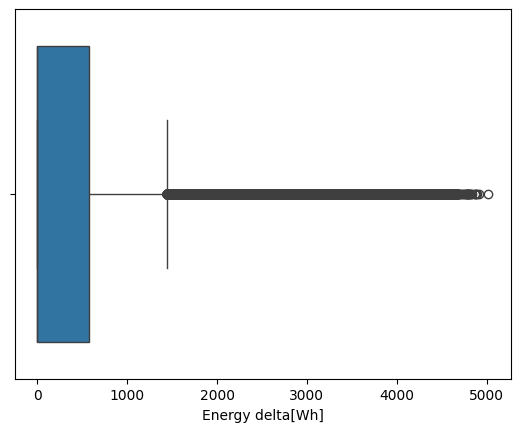

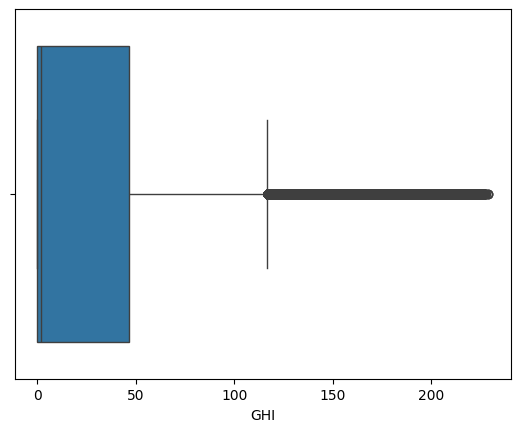

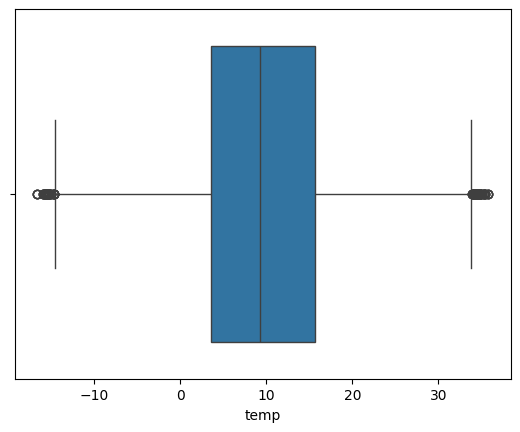

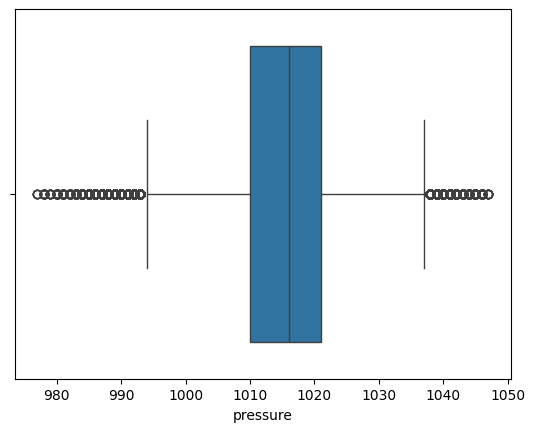

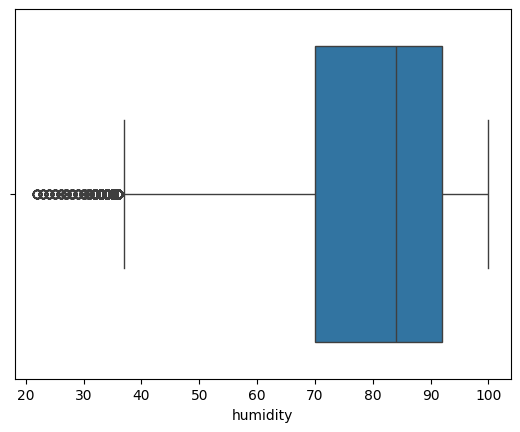

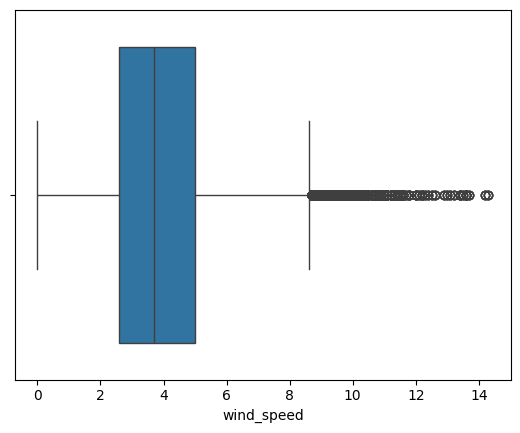

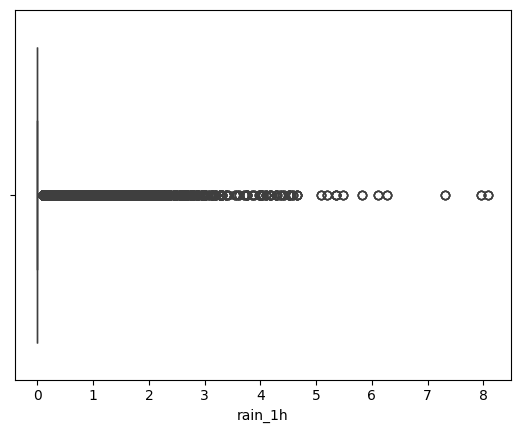

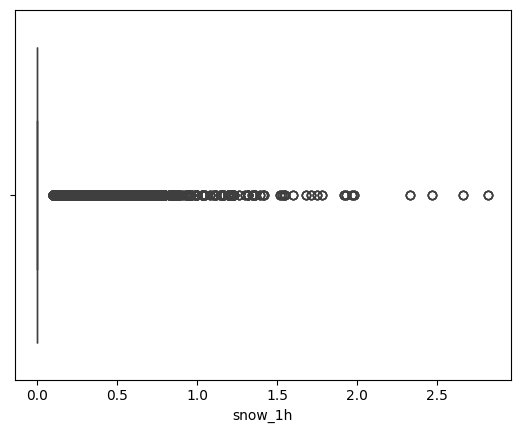

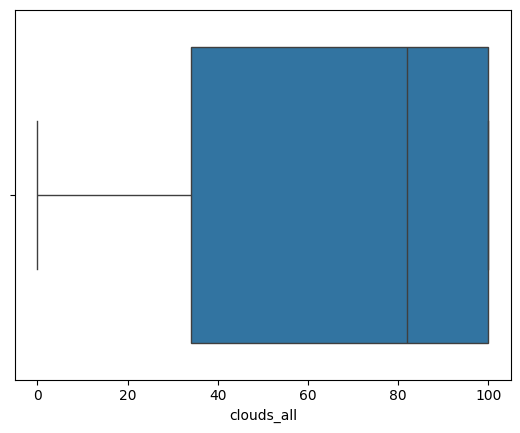

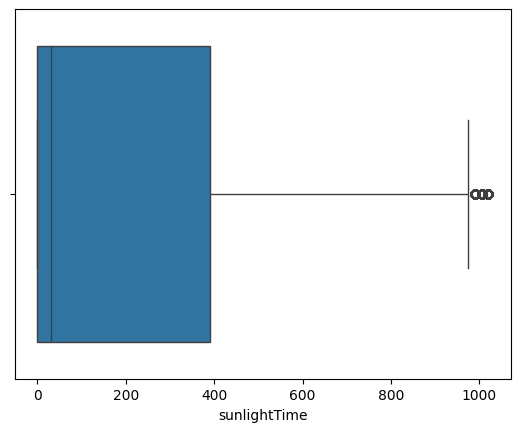

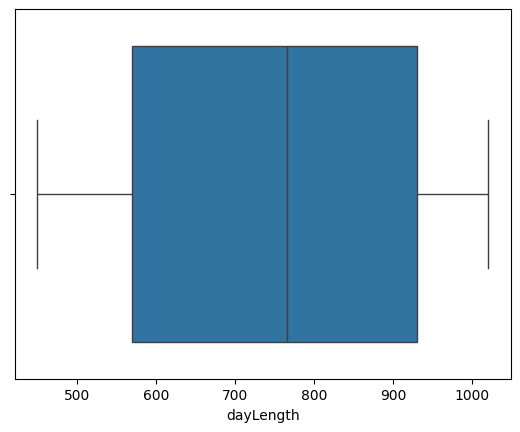

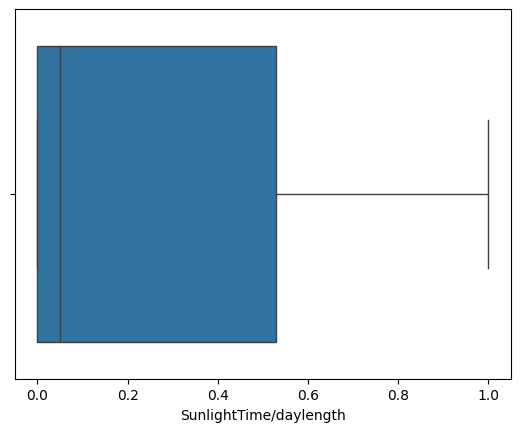

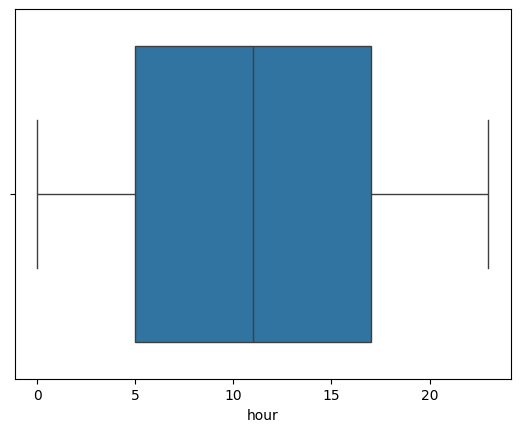

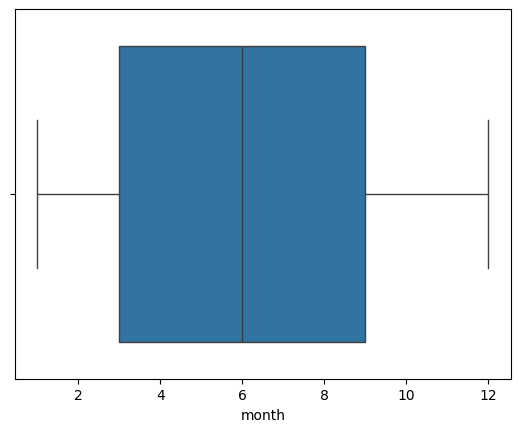

In [16]:
#Boxplot to identify outliers
for i in data_frame.select_dtypes(include="number").columns:
    sb.boxplot(data=data_frame, x =i)
    plt.show()

In [17]:
#scatter plot understanding the relationships and correlation within the data

#Get coloumn names, to isolate our independent variable "energy delta"
data_frame.select_dtypes(include="number").columns

Index(['Energy delta[Wh]', 'GHI', 'temp', 'pressure', 'humidity', 'wind_speed',
       'rain_1h', 'snow_1h', 'clouds_all', 'sunlightTime', 'dayLength',
       'SunlightTime/daylength', 'hour', 'month'],
      dtype='object')

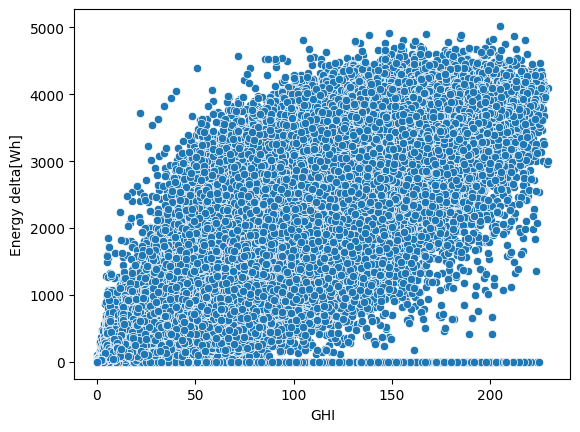

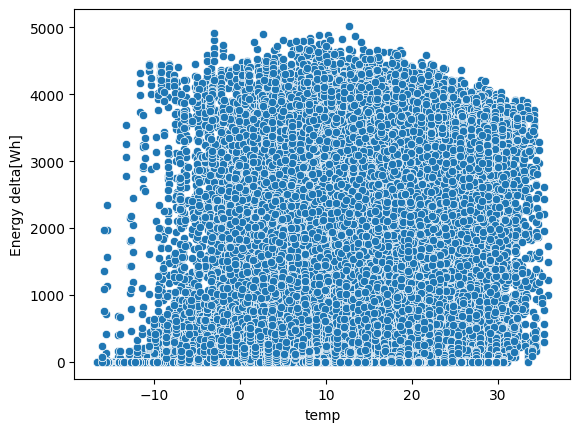

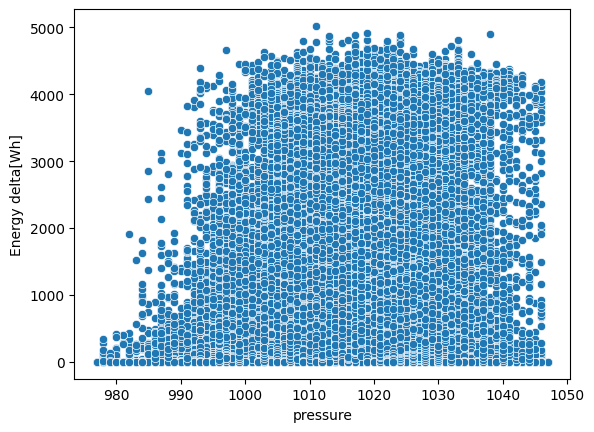

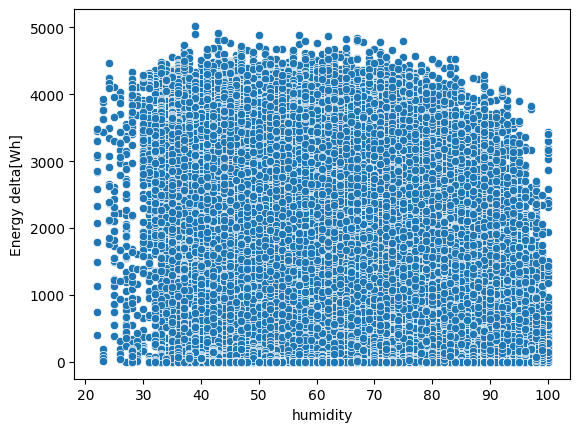

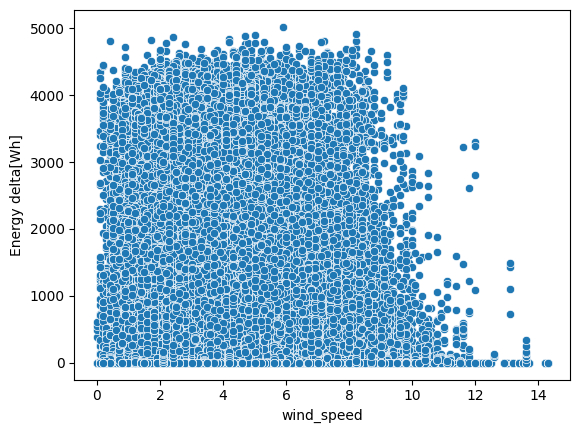

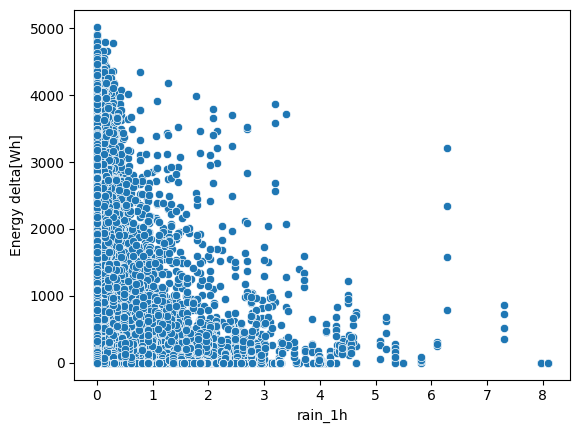

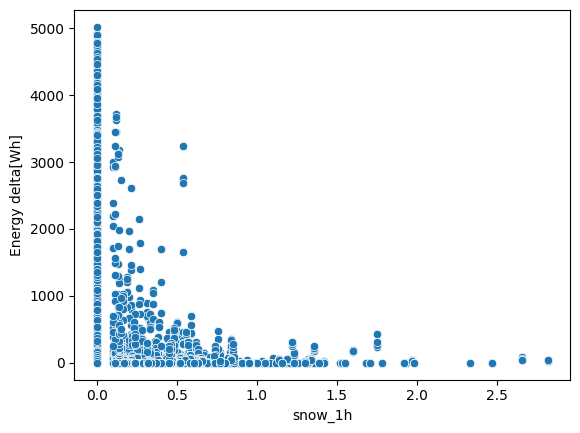

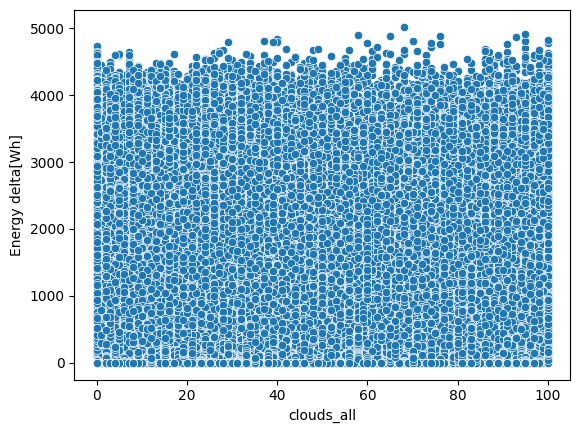

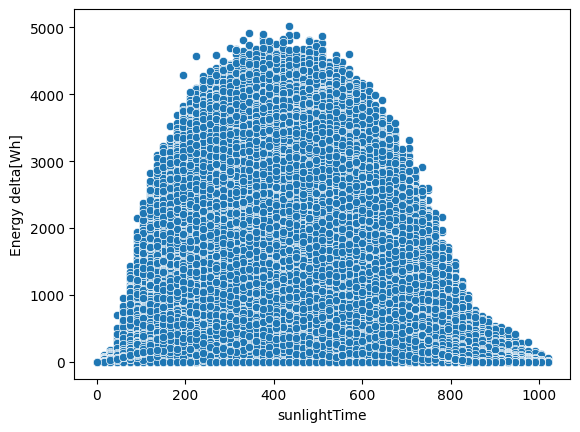

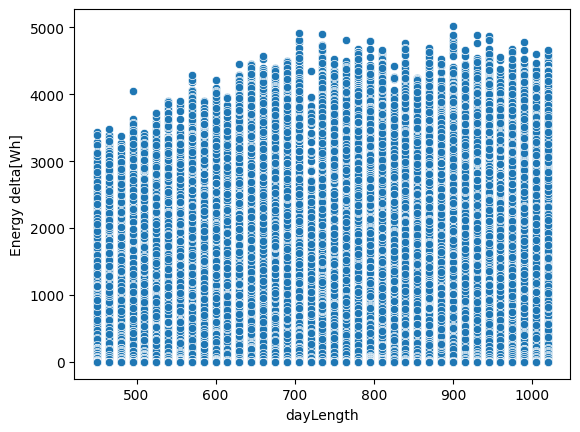

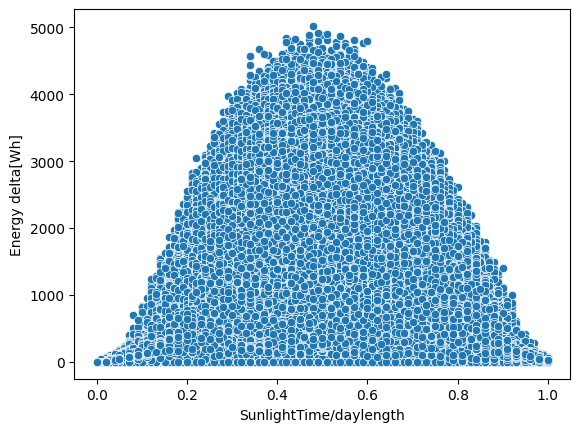

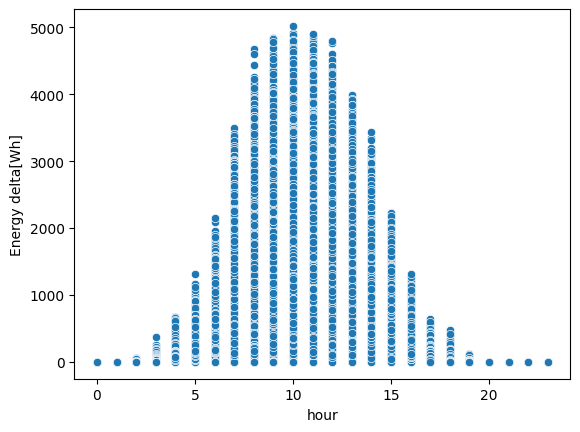

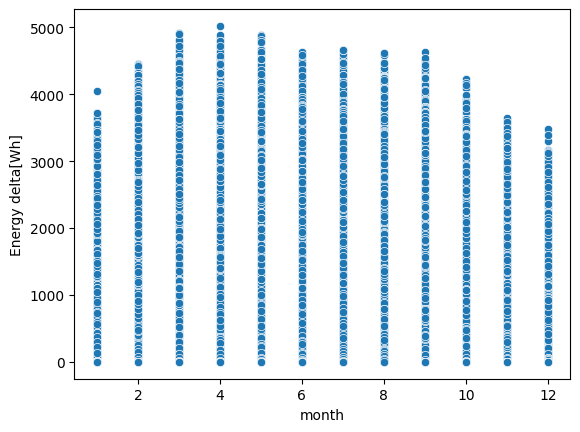

In [18]:
for i in ['GHI', 'temp', 'pressure', 'humidity', 'wind_speed',
       'rain_1h', 'snow_1h', 'clouds_all', 'sunlightTime', 'dayLength',
       'SunlightTime/daylength', 'hour', 'month']:
    sb.scatterplot(data=data_frame, x=i,y='Energy delta[Wh]')
    plt.show()

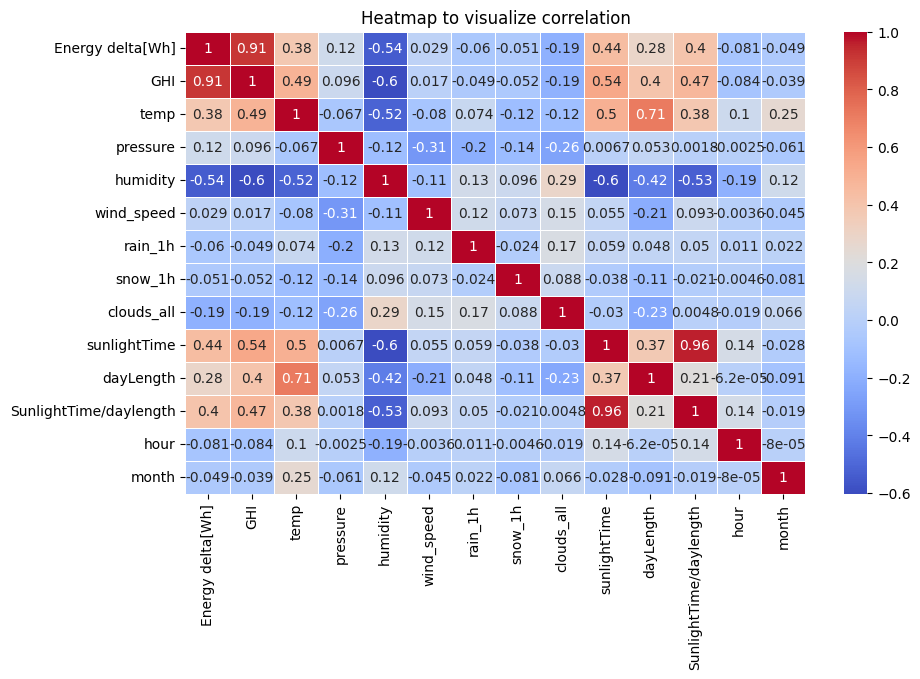

In [19]:
#Heatmap, for understanding relation and multicolliniarity
plt.figure(figsize=(10,6))  # Set figure size
sb.heatmap(data_frame.select_dtypes(include="number").corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap to visualize correlation")
plt.show()

#What Do the Colors Mean?

Dark Red: (Closer to +1) → Strong Positive Correlation
Example: If GHI (Global Horizontal Irradiance) increases and Energy Delta also increases, they will have a strong positive correlation.

Dark Blue/Dark Purple: (Closer to -1) → Strong Negative Correlation
Example: If humidity increases but GHI decreases, they have a strong negative correlation.

White or Light Colors: (Closer to 0) → No Correlation
Example: If wind_speed and weather_type have no relationship, their correlation is close to 0.

**Additional Example**
***Good for understanding useful values for regression models and predictive analysis***

GHI vs. Energy Delta (0.85) → Strong Positive Correlation (More sunlight → More energy)
Humidity vs. GHI (-0.75) → Strong Negative Correlation (Higher humidity → Less sunlight)
Wind Speed vs. Energy Delta (0.10) → Weak Correlation (Wind speed doesn’t affect energy production much)

In [20]:
#Lets remove outliers and see what changes
#Outlier treatment should only be done to Continous variables


In [ ]:

# Apply log or sqrt transformations
data_frame['Energy_log'] = np.log1p(data_frame['Energy delta[Wh]'])
data_frame['GHI_log'] = np.log1p(data_frame['GHI'])

data_frame['Energy_sqrt'] = np.sqrt(data_frame['Energy delta[Wh]'])
data_frame['GHI_sqrt'] = np.sqrt(data_frame['GHI'])

data_frame['wind_speed_sqrt'] = np.sqrt(data_frame['wind_speed'])

# For zero-heavy rain/snow, use log(1 + x) to preserve 0s
data_frame['rain_log'] = np.log1p(data_frame['rain_1h'])
data_frame['snow_log'] = np.log1p(data_frame['snow_1h'])

# Optional sqrt for humidity if it looks skewed
data_frame['humidity_sqrt'] = np.sqrt(data_frame['humidity'])

# Optional sqrt for temperature
data_frame['temp_sqrt'] = np.sqrt(data_frame['temp'] - data_frame['temp'].min() + 1)  # shift to avoid sqrt of negatives


: 

In [22]:
def plot_before_after(original_col, transformed_cols, data, bins=50):
    plt.figure(figsize=(15, 4 * len(transformed_cols)))
    
    # Original
    plt.subplot(len(transformed_cols) + 1, 1, 1)
    sb.histplot(data[original_col], bins=bins, kde=True, color='skyblue')
    plt.title(f'Original: {original_col}')
    
    # Transformed versions
    for i, col in enumerate(transformed_cols, start=2):
        plt.subplot(len(transformed_cols) + 1, 1, i)
        sb.histplot(data[col], bins=bins, kde=True, color='lightgreen')
        plt.title(f'Transformed: {col}')
    
    plt.tight_layout()
    plt.show()

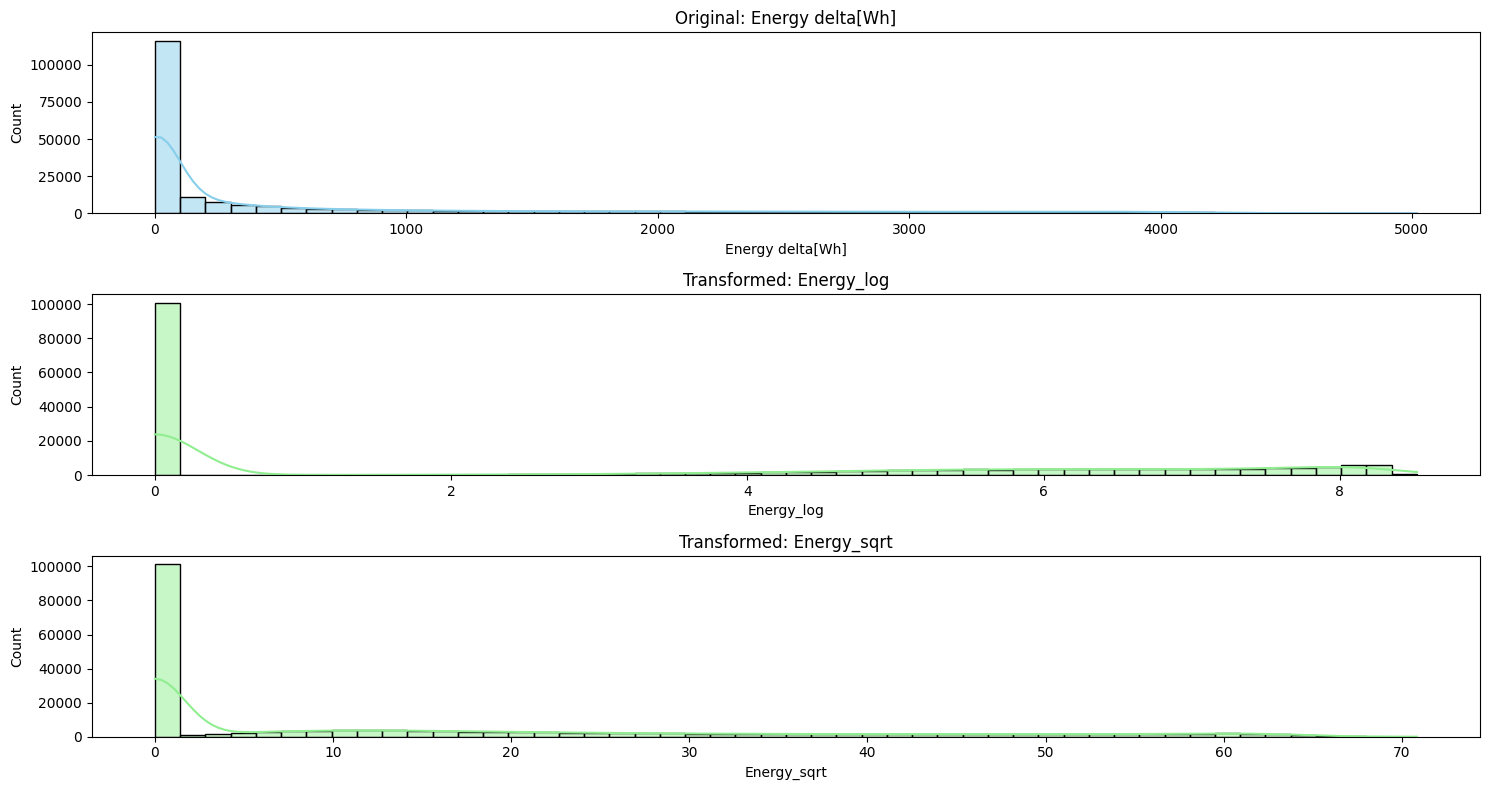

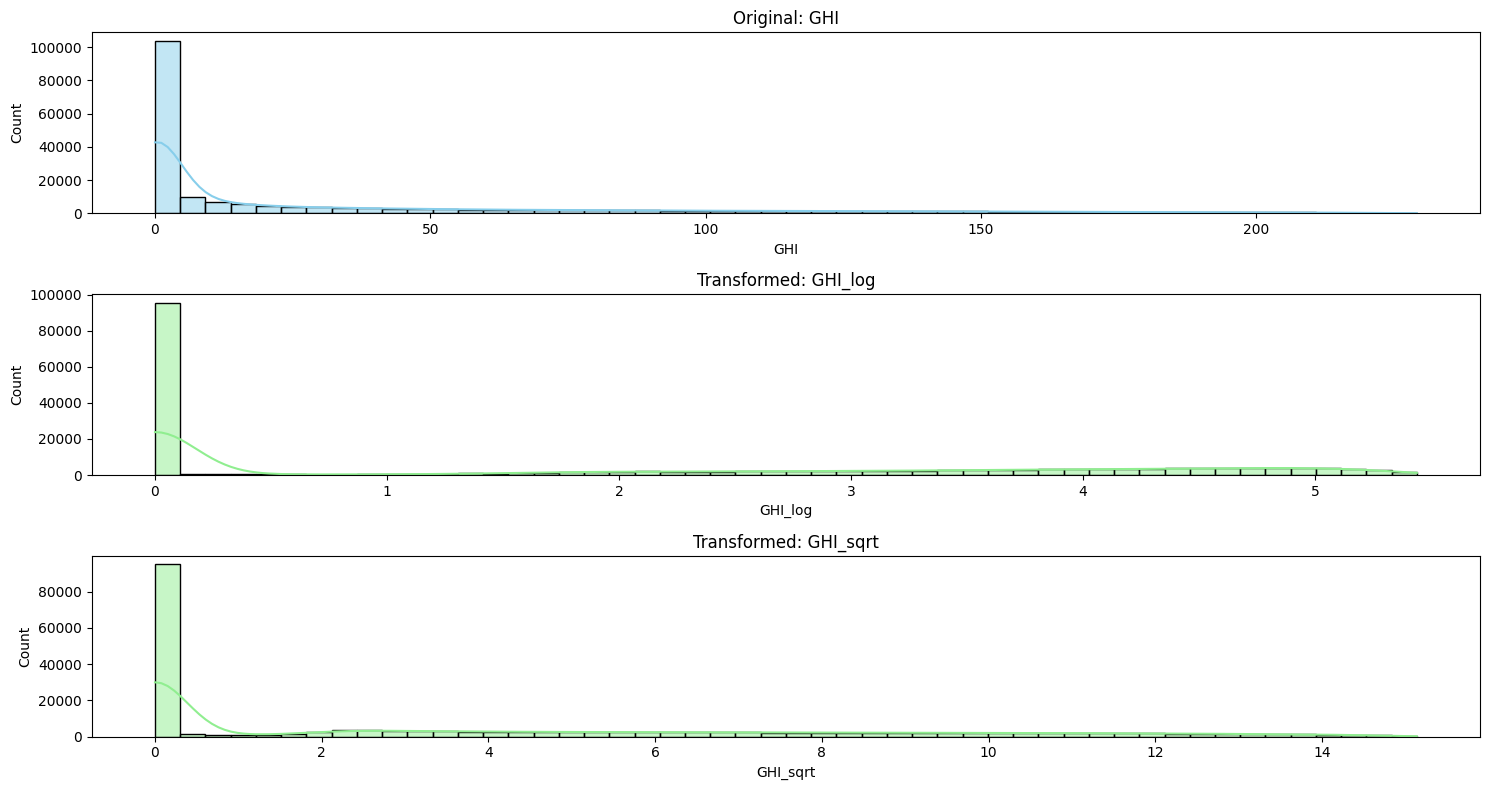

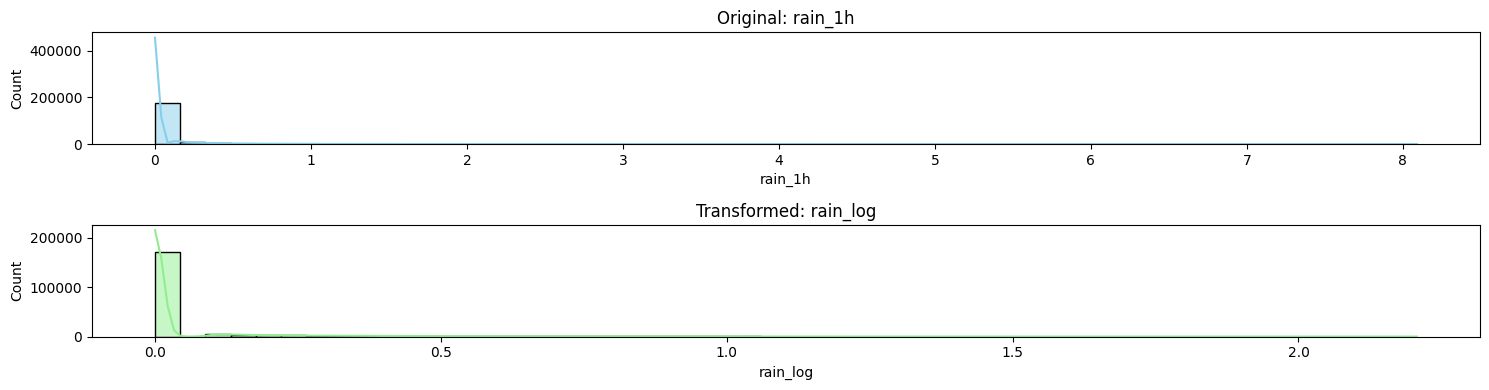

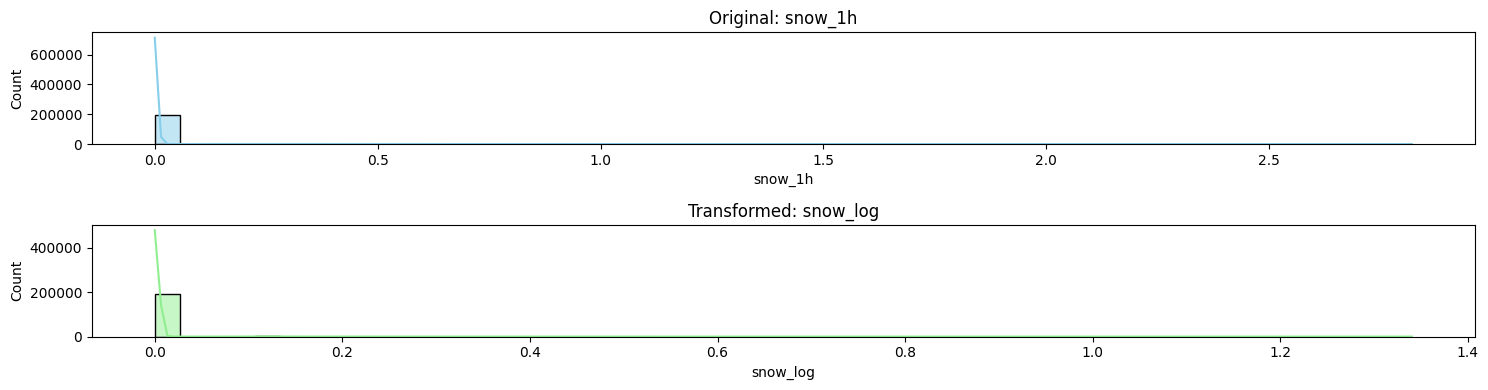

In [23]:
plot_before_after('Energy delta[Wh]', ['Energy_log', 'Energy_sqrt'], data_frame)
plot_before_after('GHI', ['GHI_log', 'GHI_sqrt'], data_frame)
plot_before_after('rain_1h', ['rain_log'], data_frame)
plot_before_after('snow_1h', ['snow_log'], data_frame)
